# DAY 04: NumPy Arrays and Vector Operations

In these challenges, you will create arrays and perform vector operations with them. Thses operations are an important feature of NumPy that makes it popular for scientific and numeric computing. Being able to perform vector operations is an important skill for all data analyst.

---

1. Create two arrays of random integers between 10 and 20. The shape of the array must be (2,3) for the first array and (1,3) for the second array. Check the shape of the arrays. Ensure that the results are reprocucible.

2. Write a code to add the two arrays you just cretaed in q1. Check the shape of the resulting array. Explain why the resulting shape is that of the bigger array from the two arrays created in q1.

3. Write another code to perform a dot operation on the arrays.

4. Using NumPy, create a 1D array of 100 random integers from 0 to 10. Use the array to create a histogram of the data and calculate the __median__ and __mode__. Ensure that the results are reproducible.

5. Using NumPy, create a 3D array of 100 random floats between 0 and 1. Use the array to create a 3D scatter plot of the data. Ensure that your results are reproducible.

6. Create a array from the list - $lst = [[0 1, 3, 0, 4], [8, 9, 0, 9, 6]]$. Write code to flatten the list and return all no-zero numbers from the list.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# DAY 04: Answers

---

1.

In [2]:
rng = np.random.default_rng(1986)

arr1 = rng.integers(11, 20, size=(2,3))
arr2 = rng.integers(11, 20, size=(1,3))

In [3]:
arr1

array([[18, 12, 13],
       [16, 14, 11]])

In [4]:
arr1.shape

(2, 3)

In [5]:
arr2

array([[18, 16, 16]])

In [6]:
arr2.shape

(1, 3)

---

2.

In [7]:
arr3 = np.add(arr1, arr2)
arr3

array([[36, 28, 29],
       [34, 30, 27]])

In [8]:
arr3.shape

(2, 3)

Neste caso temos mesmo número de colunas mas número de linhas diferentes; Como add é element-wise, `arr2` sofre broadcasting, "repetindo a mesma linha"; NumPy gera uma _view_, sendo assim as 2 linhas de `arr1` somam com a única linha de `arr2`, o que mantém o shape de `arr3` igual ao de `arr1` (2,3).

---

3.

In [9]:
# arr1 x arr2 -> precisamos transpor arr2
arr4 = np.dot(arr1,  arr2.T)
arr4

array([[724],
       [688]])

In [10]:
# arr2 x arr1 -> neste caso é arr1 que sofre transpose
arr5 = np.dot(arr2, arr1.T)
arr5

array([[724, 688]])

---

4.

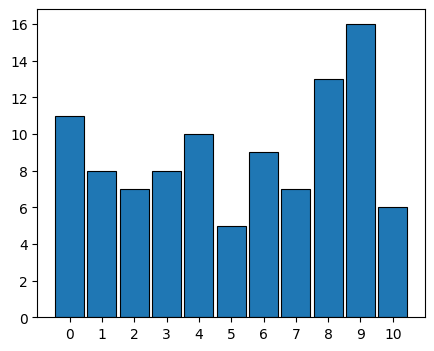

In [11]:
arr6 = rng.integers(0, 11, size=100)

plt.figure(figsize=(5,4))
bins = np.arange(-0.5, 11.5, 1)
plt.hist(arr6, bins=bins, rwidth=0.9, edgecolor="black", linewidth=0.8)
plt.xticks(range(11))
plt.show()

In [12]:
arr6.mean()

np.float64(5.22)

In [13]:
counts = np.bincount(arr6)
counts

array([11,  8,  7,  8, 10,  5,  9,  7, 13, 16,  6])

In [14]:
mode = counts.argmax()
mode

np.int64(9)

---

5.

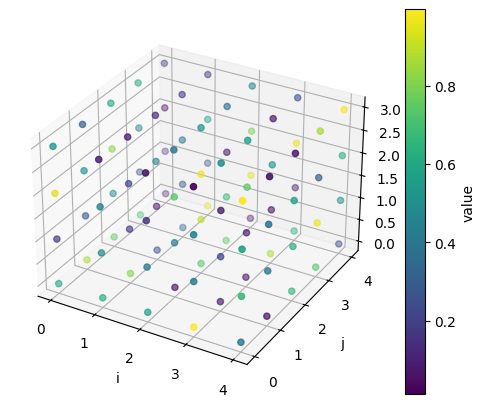

In [15]:
arr7 = rng.random(size=(5,5,4))

i, j, k = np.indices(arr7.shape)
x, y, z = i.ravel(), j.ravel(), k.ravel()
c = arr7.ravel()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(x, y, z, c=c)

fig.colorbar(sc, ax=ax, label="value")
ax.set_xlabel("i")
ax.set_ylabel("j")
ax.set_zlabel("k")
plt.show()

---

6.

In [16]:
lst = [[0,1,3,0,4],[8,9,0,9,6]]

In [17]:
arr8 = np.array(lst)
arr8

array([[0, 1, 3, 0, 4],
       [8, 9, 0, 9, 6]])

In [19]:
arr9 = np.flatnonzero(arr8)
arr9

array([1, 2, 4, 5, 6, 8, 9])

# Parecer técnico — Day 04 (NumPy Arrays and Vector Operations)

### 1) Resumo executivo

O notebook roda sem erro e cobre bem a ideia central do dia: operações vetorizadas (broadcasting), `dot`, geração reprodutível com `default_rng`, histograma e manipulação básica de arrays. Os desvios principais foram: range incorreto na Q1 (limites de `integers`), falta do cálculo de **mediana** na Q4 e, na Q6, retorno de **índices** em vez dos **valores** não-zero.

### 2) Pontuação e nota

Rubrica (core_spec v0.2.1):

* Correção e aderência aos requisitos (45%)
* Raciocínio e interpretação (20%)
* Qualidade e legibilidade do código (20%)
* Eficiência e boas práticas de dados (15%)

Notas por critério (0–10):

* Correção/requisitos: 7,70
* Raciocínio/interpretação: 7,50
* Código/legibilidade: 8,00
* Eficiência/boas práticas: 8,50

Nota final: **7,84/10**

### 3) Correções técnicas (por questão)

Q1) Dois arrays (2,3) e (1,3), inteiros entre 10 e 20, reprodutível
Você gerou com `rng.integers(11, 20, ...)`, que produz **[11, 19]** (high exclusivo). Para “10 a 20” você precisa alinhar os limites. Exemplos válidos (dependendo do “inclusive” esperado no enunciado):

* 10 a 19: `rng.integers(10, 20, ...)`
* 10 a 20 inclusive: `rng.integers(10, 21, ...)`

Q2) Soma e explicação do shape
Correto. Broadcast da linha de `arr2` sobre as linhas de `arr1`, mantendo shape (2,3). Sua explicação está boa.

Q3) Dot operation
Correto o uso de transpose para compatibilizar dimensões: `arr1 @ arr2.T` e `arr2 @ arr1.T`.

Q4) 100 inteiros 0..10, histograma, mediana e moda, reprodutível
Geração e histograma ok (`rng.integers(0, 11, 100)` + bins discretos).
Você calculou **média** (`arr6.mean()`), mas foi pedido **mediana**. A moda via `np.bincount(...).argmax()` está ok. Faltou só a mediana.

Q5) Array 3D com 100 floats e scatter 3D
Ok: `rng.random((5,5,4))` tem 100 pontos. A escolha de plotar índices (i,j,k) e usar os valores como cor é uma representação válida do volume.

Q6) Flatten e retornar números não-zero
Você usou `np.flatnonzero(arr8)`, que retorna **índices** dos não-zero, não os **valores**. O pedido era retornar os números não-zero (valores). Precisa filtrar valores por máscara/índices.

### 4) Pontos fortes

Uso correto de `default_rng` para reprodutibilidade. Broadcast bem entendido e explicado. Boas escolhas para histograma discreto (bins alinhados em inteiros). Uso de `bincount` para moda é eficiente.

### 5) Pontos a melhorar

Atenção recorrente aos limites “inclusive/exclusivo” (`integers`). Diferenciar claramente “índices de elementos não-zero” vs “valores não-zero”. Em estatística descritiva, não confundir média com mediana.

### 6) Reestudo recomendado (somente escopo já liberado)

`rng.integers` (high exclusivo), `np.median`, `np.flatnonzero` vs filtragem por máscara (`arr[arr != 0]`), e compatibilidade de shapes em `dot/@`.

---